In [219]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
items=pd.read_csv("items.csv")
shops=pd.read_csv("shops.csv")
categories=pd.read_csv("item_categories.csv")
sales=pd.read_csv("sales_train.csv")
test=pd.read_csv("test.csv")

In [221]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [222]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [223]:
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [224]:
sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


# 1. DATA CLEANING

**NEGATIVE VALUES**

In [225]:
sales.describe()
#item_price and item_cnt_day has negative values
sales = sales[sales['item_price'] > 0]
sales = sales[sales['item_cnt_day'] > 0]

In [226]:
sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day
count,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06,2.928492e+06
mean,1.456976e+01,3.300295e+01,1.020028e+04,8.894668e+02,1.248337e+00
std,9.422951e+00,1.622543e+01,6.324396e+03,1.727499e+03,2.619586e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e-02,1.000000e+00
25%,7.000000e+00,2.200000e+01,4.477000e+03,2.490000e+02,1.000000e+00
50%,1.400000e+01,3.100000e+01,9.355000e+03,3.990000e+02,1.000000e+00
75%,2.300000e+01,4.700000e+01,1.569100e+04,9.990000e+02,1.000000e+00
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03


**DUPLICATE VALUES**

In [227]:
duplicates = len(items['item_name']) - len(np.unique(items['item_name']))
print("Item duplicates: ", duplicates)
duplicates = len(items['item_id']) - len(np.unique(items['item_id']))
print("Item id duplicates:", duplicates)

duplicates = len(shops['shop_name']) - len(np.unique(shops['shop_name']))
print("Shop duplicates: ", duplicates)
duplicates = len(shops['shop_id']) - len(np.unique(shops['shop_id']))
print("Shop id duplicates:", duplicates)

duplicates = len(categories['item_category_name']) - len(np.unique(categories['item_category_name']))
print("Category duplicates: ", duplicates)
duplicates = len(categories['item_category_id']) - len(np.unique(categories['item_category_id']))
print("Category id duplicates:", duplicates)

Item duplicates:  0
Item id duplicates: 0
Shop duplicates:  0
Shop id duplicates: 0
Category duplicates:  0
Category id duplicates: 0


**EXTREME VALUES - OUTLIERS**

<AxesSubplot:>

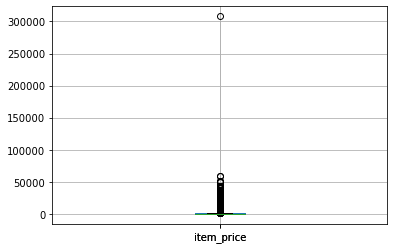

In [228]:
sales.boxplot(column='item_price')
sales = sales[sales['item_price'] < 300000]
sales.boxplot(column='item_price')

<AxesSubplot:>

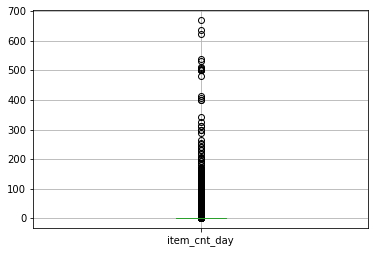

In [229]:
#sales.boxplot(column='item_cnt_day')
sales = sales[sales['item_cnt_day'] < 1000]
sales.boxplot(column='item_cnt_day')

**MISSING VALUES**

In [230]:
sales.isna().sum(axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [231]:
sales.isnull().sum(axis=0)

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [232]:
shops.isna().sum(axis=0)

shop_name    0
shop_id      0
dtype: int64

In [233]:
shops.isnull().sum(axis=0)

shop_name    0
shop_id      0
dtype: int64

In [234]:
categories.isna().sum(axis=0)

item_category_name    0
item_category_id      0
dtype: int64

In [235]:
categories.isnull().sum(axis=0)

item_category_name    0
item_category_id      0
dtype: int64

In [236]:
items.isna().sum(axis=0)

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [237]:
items.isnull().sum(axis=0)

item_name           0
item_id             0
item_category_id    0
dtype: int64

# 2. PREPROCESSING

In [238]:
from itertools import product

comb = list(product(shops['shop_id'], items['item_id']))

newdf = pd.DataFrame(data=comb, columns=['shop_id','item_id'])
#for index, row in newdf.iterrows():
    #test = row['item_id']


In [239]:

dataset = sales.pivot_table(index = ['shop_id','item_id'],values = ['item_cnt_day'],columns = ['date_block_num'],fill_value = 0,aggfunc='sum')
dataset.reset_index(inplace = True)
df = dataset[['shop_id', 'item_id']]
for i in range(34):
    df[f"m{i}"] = dataset[('item_cnt_day',i)]
    
df

C:\Users\reemet\Anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,shop_id,item_id,m0,m1,m2,m3,m4,m5,m6,m7,...,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33
date_block_num,,,,,,,,,,,...,,,,,,,,,,
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424092,59,22154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424093,59,22155,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
424094,59,22162,0,0,0,0,0,0,0,0,...,0,9,4,1,1,0,0,1,0,0


In [240]:
df1 = pd.DataFrame(data=dataset['shop_id'], columns=['shop_id'])
df1['item_id'] = dataset['item_id']
for i in range(34):
    df1[f"m{i}"] = dataset[('item_cnt_day',i)]
df1

,shop_id,item_id,m0,m1,m2,m3,m4,m5,m6,m7,...,m24,m25,m26,m27,m28,m29,m30,m31,m32,m33
0,0,30,0,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,31,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,6,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,33,3,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,1,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424092,59,22154,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
424093,59,22155,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
424094,59,22162,0,0,0,0,0,0,0,0,...,0,9,4,1,1,0,0,1,0,0
424095,59,22164,0,0,0,0,0,0,0,0,...,0,2,1,2,0,0,1,0,0,0


In [241]:
X_train = df1.drop('m33', axis=1)
y_train = df1['m33']

In [173]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

X_train = X_train.fillna(0)
model = AdaBoostRegressor(base_estimator = RandomForestRegressor(max_depth=5), random_state=1, n_estimators=1000).fit(X_train, y_train)
y_pred = model.predict(X_train)
y_pred

KeyboardInterrupt: 

In [ ]:
# creating submission file 
submission_file = pred
# we will keep every value between 0 and 20
submission_file = submission_file.clip(0,20)
# creating dataframe with required columns 
submission_trp = pd.DataFrame({'ID':ID,'item_cnt_month':submission_file.ravel()})
# creating csv file from dataframe
submission_trp.to_csv('submission_ada.csv',index = False)
submission_trp.head(20)

# 3. FEATURE ENGINEERING

Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.
The simplest approach is to predict the value at the next time (t+1) given the value at the previous time (t-1). The supervised learning problem with shifted values looks as follows:

# 4 EXPLAROTAY DATA ANALYSIS

In [200]:
def getSalesForShop(id):
    sales_shop = sales[sales["shop_id"] == id]
    sold_each_month = sales_shop.groupby(by="date_block_num", dropna=True).sum()
    counts =  sold_each_month['item_cnt_day']
    
    index = np.array(counts.index)
    for i in range(0,34):
        if np.isin(i, index) == False:
            counts[i] = 0
    return counts

def getSalesForItem(id):
    sales_item = sales[sales["item_id"] == id]
    sold_each_month = sales_item.groupby(by="date_block_num", dropna=True).sum()
    counts =  sold_each_month['item_cnt_day']
    
    index = np.array(counts.index)
    for i in range(0,34):
        if np.isin(i, index) == False:
            counts[i] = 0
    return counts

def getSalesForShopAndItem(shop_id, item_id):
    sales_shop_item = sales[(sales["shop_id"] == shop_id) & (sales["item_id"] == item_id)]
    sold_each_month = sales_shop_item.groupby(by="date_block_num", dropna=True).sum()
    counts =  sold_each_month['item_cnt_day']
    
    index = np.array(counts.index)
    for i in range(0,34):
        if np.isin(i, index) == False:
            counts[i] = 0
    return counts

def getSalesForItemCategory(category_id):
    merged = pd.merge(sales, items, on='item_id', how='inner')
    merged_new = merged[(merged["item_category_id"] == category_id)]
    counts =  sold_each_month['item_cnt_day']
    
    index = np.array(counts.index)
    for i in range(0,34):
        if np.isin(i, index) == False:
            counts[i] = 0
    return counts

def getSalesForShopAndItemCategory(shop_id, category_id):
    merged = pd.merge(sales, items, on='item_id', how='inner')
    merged_new = merged[(merged["shop_id"] == shop_id) & (merged["item_category_id"] == category_id)]
    sold_each_month = merged_new.groupby(by="date_block_num", dropna=True).sum()
    counts =  sold_each_month['item_cnt_day']
    
    index = np.array(counts.index)
    for i in range(0,34):
        if np.isin(i, index) == False:
            counts[i] = 0
    return counts

def getTotalSales():
    sales_item = sales
    sold_each_month = sales_item.groupby(by="date_block_num", dropna=True).sum()
    return sold_each_month['item_cnt_day']

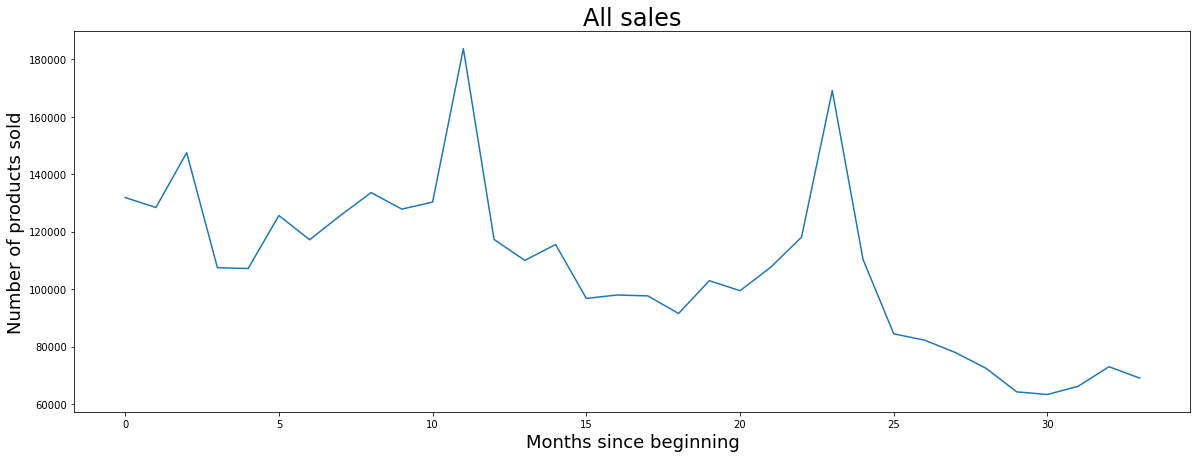

In [201]:
sales_data = getTotalSales()
x = range(0,34)
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.plot(x, sales_data)

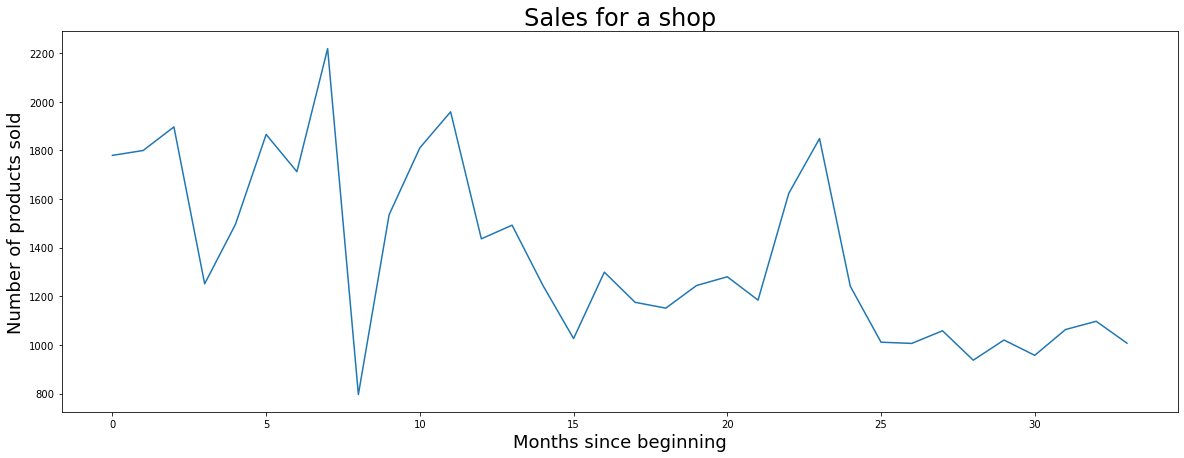

In [208]:
sales_data = getSalesForShop(14)
x = range(0,34)
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("Sales for a shop", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.plot(x, sales_data)

C:\Users\reemet\Anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


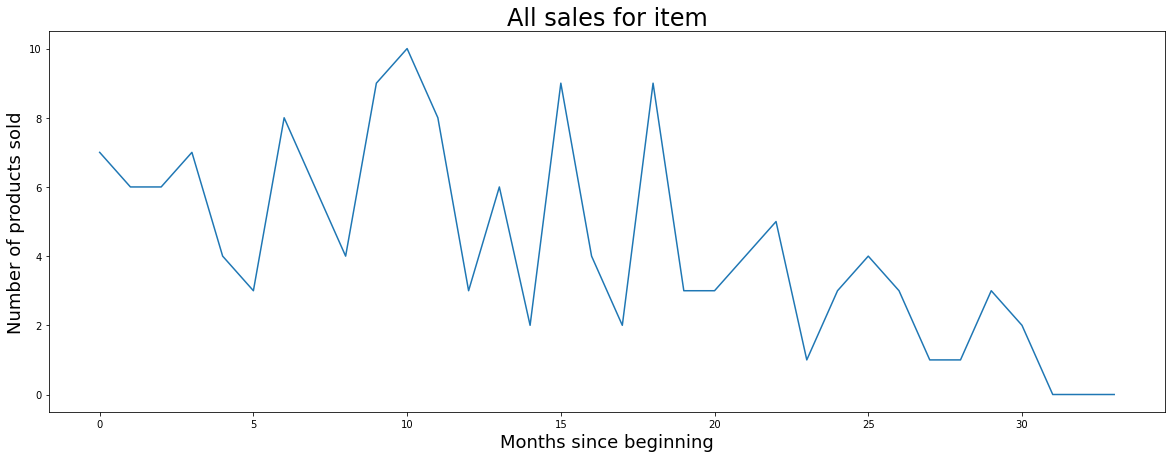

In [210]:
sales_data = getSalesForItem(258)
x = range(0,34)
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales for item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.plot(x, sales_data)

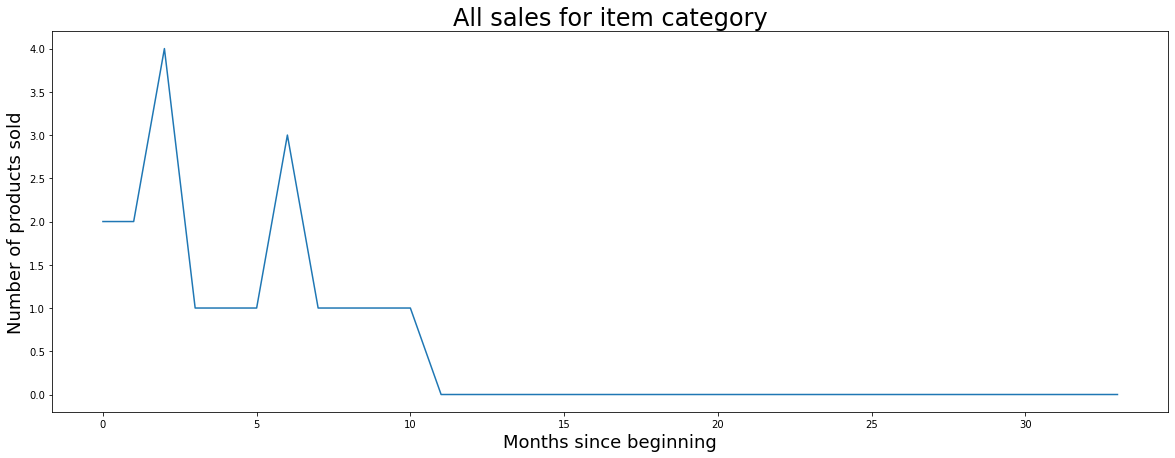

In [216]:
sales_data = getSalesForItemCategory(36)
x = range(0,34)
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales for item category", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.plot(x, sales_data)

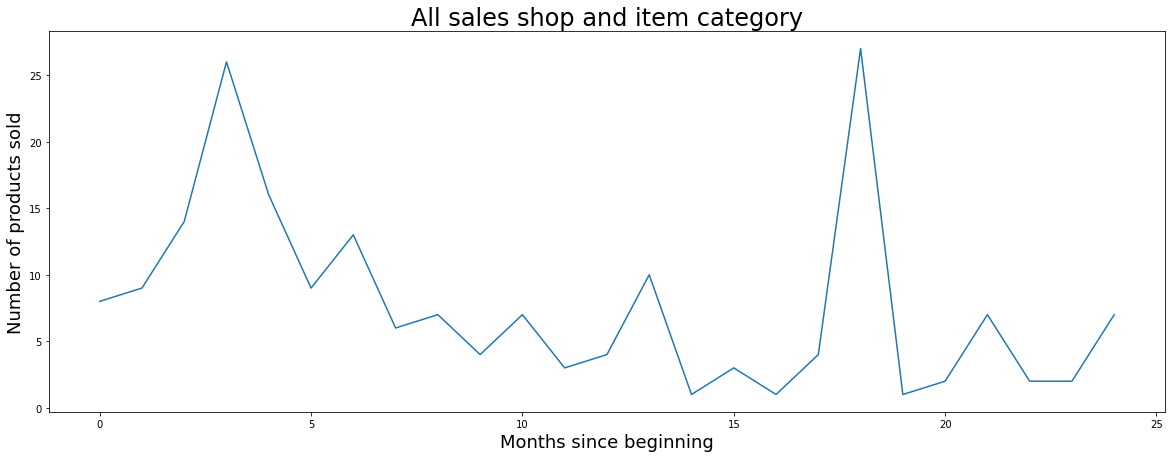

In [27]:
sales_data = getSalesForShopAndItemCategory(15, 25)
x = range(0,34)
fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales shop and item category", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.plot(x, sales_data)

C:\Users\reemet\Anaconda3\envs\Python36\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


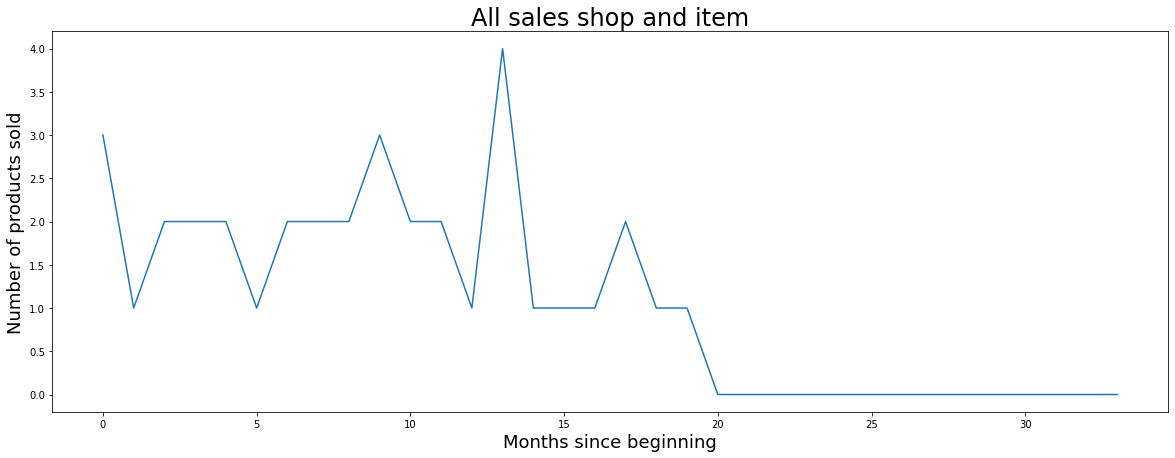

In [218]:
sales_data = getSalesForShopAndItem(25, 1025)
x = range(0,34)

index = np.array(sales_data.index)
for i in range(0,34):
    if np.isin(i, index) == False:
        sales_data[i] = 0


fig, ax = plt.subplots(figsize=(20,7))
ax.set_title("All sales shop and item", fontsize=24)
ax.set_ylabel("Number of products sold", fontsize=18)
ax.set_xlabel("Months since beginning", fontsize=18)
ax.plot(x, sales_data)

# MODELLING

# NEURAL NETWORK

In [279]:
#X_train
#X_train = X_train.fillna(0)
#X_train
len(X_train.columns)

32

In [280]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import  tensorflow.keras.optimizers as optimizers
import tensorflow as tf
n_features = X_train.shape[1]
n_steps = 3
model = Sequential()
model.add(Dense(32))

model.add(Dense(1))
model.compile(optimizer=optimizers.Adam(lr=.0001), loss=tf.keras.metrics.mean_squared_error, metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse')])     


In [281]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.23, patience=2, min_lr=0.0001, verbose=1),
    ModelCheckpoint('model.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [291]:
X_train = X_train.fillna(0)
Y_train = Y_train.fillna(0)
X_valid = X_valid.fillna(0)
Y_valid = Y_valid.fillna(0)

In [292]:
model.fit(X_train, Y_train, epochs=15, callbacks=callbacks, validation_data=(X_valid, Y_valid))

Epoch 1/15
286804/286820 [============================>.] - ETA: 0s - loss: nan - rmse: nan
Epoch 00001: val_loss did not improve from inf
286820/286820 [==============================] - 325s 1ms/step - loss: nan - rmse: nan - val_loss: nan - val_rmse: nan
Epoch 2/15
   152/286820 [..............................] - ETA: 4:47 - loss: nan - rmse: nan

C:\Users\reemet\Anaconda3\envs\Python36\lib\site-packages\tensorflow\python\keras\callbacks.py:1664: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\reemet\Anaconda3\envs\Python36\lib\site-packages\tensorflow\python\keras\callbacks.py:2347: RuntimeWarning: invalid value encountered in less
  self.monitor_op = lambda a, b: np.less(a, b - self.min_delta)
C:\Users\reemet\Anaconda3\envs\Python36\lib\site-packages\tensorflow\python\keras\callbacks.py:1291: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


286814/286820 [============================>.] - ETA: 0s - loss: nan - rmse: nan
Epoch 00002: val_loss did not improve from inf
286820/286820 [==============================] - 333s 1ms/step - loss: nan - rmse: nan - val_loss: nan - val_rmse: nan
Epoch 3/15
286792/286820 [============================>.] - ETA: 0s - loss: nan - rmse: nan
Epoch 00003: val_loss did not improve from inf
286820/286820 [==============================] - 329s 1ms/step - loss: nan - rmse: nan - val_loss: nan - val_rmse: nan
Epoch 4/15
286810/286820 [============================>.] - ETA: 0s - loss: nan - rmse: nan
Epoch 00004: val_loss did not improve from inf
286820/286820 [==============================] - 329s 1ms/step - loss: nan - rmse: nan - val_loss: nan - val_rmse: nan
Epoch 5/15
286787/286820 [============================>.] - ETA: 0s - loss: nan - rmse: nan
Epoch 00005: val_loss did not improve from inf
286820/286820 [==============================] - 329s 1ms/step - loss: nan - rmse: nan - val_loss:

In [ ]:
# create submission file 
submit = model.predict(X_test)
# clip between 0 and 20
submit = submit.clip(0,20)
# creating dataframe with required columns 
submission = pd.DataFrame({'ID':test_df['ID'],'item_cnt_month':submit.ravel()})
# creating csv file from dataframe
submission.to_csv('submit_network.csv',index = False)

In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train.fillna(0), Y_train.fillna(0))

LinearRegression()

In [136]:
predictions = model.predict(X_valid.fillna(0))